# Aplicação no Mercado Financeiro de empresas de tecnologia

Nessa atividade, faremos uma análise de uma carteira de ações das empresas de tecnologia mais importantes, comparando-as com o índice NASDAQ.

As empresas que serão analisadas são as que compõem o FAANG (Facebook, Amazon, Apple, Netflix e Google), juntamente com a Tesla e o índice NASDAQ, para comparação. Esses são os identificadores das empresas:
* Meta (antigo Facebook) - META
* Amazon - AMZN
* Apple - AAPL
* Netflix - NFLX
* Google - GOOGL
* Tesla - TSLA
* NASDAQ - ^NDX

## Setup do ambiente (preparação das bibliotecas)

In [115]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from scipy import stats
from scipy import optimize

pio.renderers.default = 'notebook_connected'

## Construindo a base de dados com as ações selecionadas

Faremos uma lista das ações que queremos verificar na carteira e buscaremos as informações no Yahoo Finance, utilizando a biblioteca do Panda Datareader para isso.

In [116]:
acoes = ['META','AMZN', 'AAPL', 'NFLX', 'GOOGL', 'TSLA', '^NDX']
print('Ações que serão pesquisadas:')
acoes

Ações que serão pesquisadas:


['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL', 'TSLA', '^NDX']

In [117]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao,
                                     data_source='yahoo', start='2015-01-01')['Close']

O resultado da pesquisa pode ser verificado abaixo:

In [118]:
acoes_df

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
Date,,,,,,,
2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...
2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391
2022-07-27,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022,12601.469727


Será necessário incluir um índice independente na lista, pois a pesquisa coloca como chave de cada registro a data. É possível fazer isso utilizando a função `reset_index` do `DataFrame`. Ao utilizarmos o argumento `inplace=True`, nós garantimos que não há nenhuma perda de dados.

In [119]:
acoes_df.reset_index(inplace=True)
acoes_df

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...,...
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391
1904,2022-07-27,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022,12601.469727
1905,2022-07-28,160.720001,122.279999,157.350006,226.020004,114.220001,842.700012,12717.870117


## Visualização dos Dados

A Biblioteca Ploty, do Python, nos permite visualizar, de forma gráfica, os dados que recuperamos. Vamos ver o histórico de preços das ações no decorrer do tempo:

In [120]:
figuraHistorico = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figuraHistorico.add_scatter(x = acoes_df["Date"] ,y = acoes_df[i], name = i)
figuraHistorico.show()

Podemos observar que o gráfico mostra o abalo geral que aconteceu em março de 2020, devido à pandemia do Coronavírus, assim como a desvalorização recorde da META em fevereiro de 2022, por conta do balanço em que relatou um declínio de usuários ativos em comparação com rivais como o TikTok. A perda de valor de mercado do Netflix também se destaca, em um movimento que começou no final de 2021 e que levou a um recente rebaixamento dos papeis da empresa.

## Taxa de Retorno de Ações

Um dos indicadores que vamos analisar é a taxa de retorno das ações da carteira. Ela basicamente se define como a razão entre o valor atual e o valor anterior. Com os dados que temos, podemos acompanhar a evolução da taxa de retorno comparando o valor de fechamento de um dia com o valor do fechamento do dia anterior. Como há um intervalo de tempo entre esses dois pontos, essa diferença é abrupta, e é possível suavizá-la com o uso do `log`.

A expressão da Valor Esperado da taxa de retorno pode ser descrita assim:

$$ \mathbb{E} [ R_i] = log \left( \frac{P_t}{P_{t-1}} \right) $$

Como temos os dados variando no tempo, é possível fazer esse cálculo para cada registro. Felizmente não será necessário fazer a iteração manual dos dados, pois a  biblioteca `NumPy` tem, através da função `log`, a capacidade de fazer a operação utilizando dois `DataFrame`s, utilizando como argumento os de mesmo índice.

Já temos o `DataFrame` com os dados originais, e só nos falta montar outro com os dados do dia anterior, com o mesmo índice dos dados originais, para poder fazer o cálculo. O artifício que vamos usar para isso é a função `shift` do `DataFrame`. Essa função adiciona uma quantidade de registros no topo do `DataFrame`. Aplicando isso no nosso conjunto de dados, conseguiremos uma cópia dos dados do dia anterior, alinhados com o índice dos nossos dados originais.

O primeiro passo é copiar o `DataFrame` das ações:

In [121]:
dataset = acoes_df.copy()
dataset

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...,...
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391
1904,2022-07-27,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022,12601.469727
1905,2022-07-28,160.720001,122.279999,157.350006,226.020004,114.220001,842.700012,12717.870117


Com a cópia, vamos retirar a coluna `Date`, pois ela não será usada no cálculo: 

In [122]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...
1902,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391
1904,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022,12601.469727
1905,160.720001,122.279999,157.350006,226.020004,114.220001,842.700012,12717.870117


Realizamos o `shift` para verificar o funcionamento e constatar que a primeira linha foi deslocada:

In [123]:
dataset.shift(1)

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
2,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
3,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
4,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
...,...,...,...,...,...,...,...
1902,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
1903,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1904,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391
1905,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022,12601.469727


O resultado das taxas de retorno pode ser visto abaixo:

In [124]:
taxas_retorno = np.log(dataset / dataset.shift(1))
taxas_retorno

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016191,-0.020731,-0.028576,-0.052238,-0.019238,-0.042950,-0.016513
2,-0.013565,-0.023098,0.000094,-0.017269,-0.024989,0.005648,-0.012121
3,0.000000,0.010544,0.013925,0.005178,-0.002945,-0.001563,0.011890
4,0.026309,0.006813,0.037703,0.021946,0.003478,-0.001566,0.019178
...,...,...,...,...,...,...,...
1902,-0.015599,-0.010511,-0.007426,-0.008794,-0.003621,-0.014094,-0.005505
1903,-0.046049,-0.053668,-0.008866,-0.021276,-0.023433,-0.036315,-0.019784
1904,0.063478,0.052264,0.033662,0.058293,0.073768,0.059829,0.041691
1905,-0.053661,0.010771,0.003565,-0.003225,0.010208,0.021882,0.009195


A função `describe` do `DataFrame` pode nos proporcionar várias informações estatísticas importantes sobre as taxas de retorno:

In [125]:
taxas_retorno.describe()

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,0.000371,0.001138,0.000935,0.000790,0.000777,0.001580,0.000587
std,0.022610,0.020404,0.018614,0.028919,0.017379,0.035500,0.014173
min,-0.306391,-0.151398,-0.137708,-0.432578,-0.123685,-0.236518,-0.130032
25%,-0.008798,-0.008103,-0.007270,-0.011657,-0.006638,-0.014775,-0.004766
50%,0.000921,0.001306,0.000899,0.000310,0.001201,0.001296,0.001240
75%,0.011723,0.010829,0.010294,0.014517,0.009181,0.018793,0.007590
max,0.162064,0.132178,0.113157,0.174189,0.150645,0.181445,0.095966


Agora podemos reconstruir os dados de retorno das ações, incluindo a data de cada registro, permitindo a visualização do comportamento do retorno ao longo do tempo. Para isso, podemos selecionar a coluna de data do `DataFrame` original e juntá-lo com a matriz das taxas de retorno. 

In [126]:
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
date

,Date
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
1902,2022-07-25
1903,2022-07-26
1904,2022-07-27
1905,2022-07-28


In [127]:
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.016191,-0.020731,-0.028576,-0.052238,-0.019238,-0.042950,-0.016513
2,2015-01-06,-0.013565,-0.023098,0.000094,-0.017269,-0.024989,0.005648,-0.012121
3,2015-01-07,0.000000,0.010544,0.013925,0.005178,-0.002945,-0.001563,0.011890
4,2015-01-08,0.026309,0.006813,0.037703,0.021946,0.003478,-0.001566,0.019178
...,...,...,...,...,...,...,...,...
1902,2022-07-25,-0.015599,-0.010511,-0.007426,-0.008794,-0.003621,-0.014094,-0.005505
1903,2022-07-26,-0.046049,-0.053668,-0.008866,-0.021276,-0.023433,-0.036315,-0.019784
1904,2022-07-27,0.063478,0.052264,0.033662,0.058293,0.073768,0.059829,0.041691
1905,2022-07-28,-0.053661,0.010771,0.003565,-0.003225,0.010208,0.021882,0.009195


E com isso, plotar um gráfico desse histórico:

In [128]:
figuraHistoricoRetorno = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno_date.columns[1:]:
  figuraHistoricoRetorno.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[i], name = i)
figuraHistoricoRetorno.show()

Pelo gráfico, podemos perceber que as ações da Tesla foram as que deram maiores picos de retorno. Mas, como esperado no mercado financeiro, também foi a que teve maior variação, pois o retorno é proporcional ao risco. Amazon e Google parecem as mais comportadas da carteira.

### Covariância das taxas de retorno

O `DataFrame` nos permite verificar um dados interessante também: a *covariância* entre duas ações. No mercado financeiro, esse dado pode ser usado para avaliar como o  comportamento do preço de um ativo influencia no aumento ou diminuição de outro. No nosso caso, temos ao resultado abaixo: 

In [129]:
taxas_retorno.cov()

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
META,0.000511,0.000276,0.000234,0.000314,0.000259,0.000282,0.000232
AMZN,0.000276,0.000416,0.000219,0.000314,0.000232,0.000288,0.000218
AAPL,0.000234,0.000219,0.000346,0.000223,0.000203,0.000284,0.000219
NFLX,0.000314,0.000314,0.000223,0.000836,0.000238,0.000351,0.000234
GOOGL,0.000259,0.000232,0.000203,0.000238,0.000302,0.000241,0.000203
TSLA,0.000282,0.000288,0.000284,0.000351,0.000241,0.001260,0.000276
^NDX,0.000232,0.000218,0.000219,0.000234,0.000203,0.000276,0.000201


Na amostra que temos, nota-se que as ações da Netflix tem uma covariância alta com Meta, Amazon e Tesla, indicando que mudanças nessas três ações impactarão o preço da primeira mais do que flutuações de preço da Apple e Google.

### Correlação entre as taxas de retorno

Além da covariância, outro indicador que é importante de analisar é a *correlação*. A correlação visa entender o comportamento entre dois ativos. Isso significa compreender se eles apresentam desempenho semelhante ou diferente, de acordo com os acontecimentos econômicos. No nosso exemplo, o seguinte cenário ocorre:

In [130]:
taxas_retorno.corr()

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
META,1.000000,0.597663,0.557073,0.480020,0.658870,0.351200,0.723132
AMZN,0.597663,1.000000,0.577612,0.532098,0.654624,0.397735,0.753186
AAPL,0.557073,0.577612,1.000000,0.413478,0.628068,0.429570,0.830247
NFLX,0.480020,0.532098,0.413478,1.000000,0.473885,0.341494,0.571876
GOOGL,0.658870,0.654624,0.628068,0.473885,1.000000,0.391439,0.822785
TSLA,0.351200,0.397735,0.429570,0.341494,0.391439,1.000000,0.548690
^NDX,0.723132,0.753186,0.830247,0.571876,0.822785,0.548690,1.000000


Da carteira apresentada, temos então:
| Ação | Ação de maior correlação|
|------|-------------------------|
| Meta | Google |
| Amazon | Google |
| Apple | Google |
| Netflix | Amazon |
| Google | Meta |
| Tesla | Apple |

Logo, uma variação das ações da Google vai afetar bastante a carteira, pois Meta, Amazon e Apple tendem a acompanhar essa mudança.

Utilizando um mapa de calor, podemos verificar essa informação:

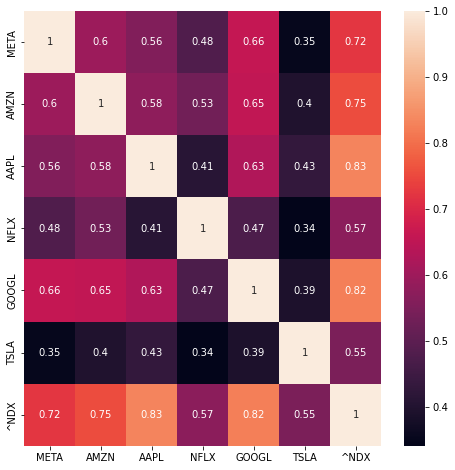

In [131]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Montando uma Carteira de Ativos

Podemos verificar como uma carteira que contenha um conjunto de ações se comporta no decorrer do tempo, através da média das taxas de retorno de cada uma delas. Isso indicará a performance geral da carteira, e pode ser feito usando uma propriedade do `DataFrame`: ao fazermos uma operação aritmética no objeto, ele realiza essa operação em cada um dos elementos da matriz. É possível, também, filtrar cada uma das colunas do `DataFrame`, isolando as informações de uma ação específica.

Sendo assim, ao fazermos a soma de cada uma das ações e dividirmos pelo total de ações, teremos uma nova coluna (`CARTEIRA`) com a média da taxa de retorno diária do conjunto de ações, como representado abaixo:

In [132]:

taxas_retorno_date["CARTEIRA"] = (taxas_retorno_date['META'] + taxas_retorno_date['AMZN'] + 
                                   taxas_retorno_date['AAPL'] + taxas_retorno_date['NFLX'] + 
                                   taxas_retorno_date['GOOGL'] +taxas_retorno_date['TSLA'] )/6
taxas_retorno_date

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX,CARTEIRA
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.016191,-0.020731,-0.028576,-0.052238,-0.019238,-0.042950,-0.016513,-0.029987
2,2015-01-06,-0.013565,-0.023098,0.000094,-0.017269,-0.024989,0.005648,-0.012121,-0.012196
3,2015-01-07,0.000000,0.010544,0.013925,0.005178,-0.002945,-0.001563,0.011890,0.004190
4,2015-01-08,0.026309,0.006813,0.037703,0.021946,0.003478,-0.001566,0.019178,0.015780
...,...,...,...,...,...,...,...,...,...
1902,2022-07-25,-0.015599,-0.010511,-0.007426,-0.008794,-0.003621,-0.014094,-0.005505,-0.010007
1903,2022-07-26,-0.046049,-0.053668,-0.008866,-0.021276,-0.023433,-0.036315,-0.019784,-0.031601
1904,2022-07-27,0.063478,0.052264,0.033662,0.058293,0.073768,0.059829,0.041691,0.056882
1905,2022-07-28,-0.053661,0.010771,0.003565,-0.003225,0.010208,0.021882,0.009195,-0.001743


Temos agora a possibilidade de comparar a performance da carteira com o Índice Nasdaq, selecionando as colunas `Data`, `CARTEIRA` e `^NDX` do nosso conjunto de dados:

In [133]:
taxas_retorno_port = taxas_retorno_date.filter(["Date", "CARTEIRA", '^NDX'])
taxas_retorno_port

,Date,CARTEIRA,^NDX
0,2015-01-02,NaN,NaN
1,2015-01-05,-0.029987,-0.016513
2,2015-01-06,-0.012196,-0.012121
3,2015-01-07,0.004190,0.011890
4,2015-01-08,0.015780,0.019178
...,...,...,...
1902,2022-07-25,-0.010007,-0.005505
1903,2022-07-26,-0.031601,-0.019784
1904,2022-07-27,0.056882,0.041691
1905,2022-07-28,-0.001743,0.009195


E a representação gráfica fica conforme abaixo:

In [134]:
figuraComparacao = px.line(title = 'Comparação de retorno Carteira x Nasdaq')
for i in taxas_retorno_port.columns[1:]:
  figuraComparacao.add_scatter(x = taxas_retorno_port["Date"] ,y = taxas_retorno_port[i], name = i)
figuraComparacao.add_hline(y = taxas_retorno_port['CARTEIRA'].mean(), line_color="green", line_dash="dot", )
figuraComparacao.show()

Conferimos, então, que a performance é bastante semelhante. Isso é de certa forma esperado, uma vez que esse índice reúne as ações das 100 maiores empresas de tecnologia, e os FAANG, juntamente com a Tesla, têm uma influência direta nesses rendimentos. Isso fica ainda mais claro ao fazermos a correlação entre a carteira e o índice, como mostra a tabela e o mapa de calor:

In [135]:
taxas_retorno_port_corr = taxas_retorno_date.filter(["CARTEIRA", "^NDX"])
taxas_retorno_port_corr

,CARTEIRA,^NDX
0,NaN,NaN
1,-0.029987,-0.016513
2,-0.012196,-0.012121
3,0.004190,0.011890
4,0.015780,0.019178
...,...,...
1902,-0.010007,-0.005505
1903,-0.031601,-0.019784
1904,0.056882,0.041691
1905,-0.001743,0.009195


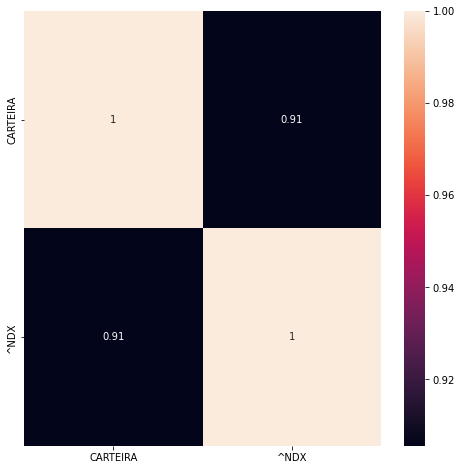

In [136]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno_port_corr.corr(), annot=True);

#### Alocação Aleatória de Ativos - Portfólio Markowitz

Harry Markowitz desenvolveu, nos anos 50, a Teoria Moderna do Portfólio. Essa teoria  apresenta um modelo de montagem de carteira que analisa os ativos com suposições de risco, retorno e correlação futuros. A partir dos dados é calculado uma série de possíveis alocações, entre essas possíveis alocações os portfólios que maximizam o retorno esperado e minimizam o risco formam a chamada fronteira eficiente. A TMP leva em consideração que o investidor sempre deseja ter o maior retorno possível dado determinado nível de tolerância ao risco.

O primeiro passo para simularmos um portfólio aleatório é retirarmos o índice NASDAQ do `DataFrame` que contém os dados, de forma que tenhamos apenas os dados das empresas:

In [137]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ["^NDX"], axis=1, inplace=True)
acoes_port

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001
...,...,...,...,...,...,...,...
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017
1904,2022-07-27,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022
1905,2022-07-28,160.720001,122.279999,157.350006,226.020004,114.220001,842.700012


Definiremos agora um método que gera, de forma aleatória, um peso para cada uma das ações especificadas. Esse método também recebe como parâmetro o dinheiro investido, de forma que possa calcular o total do rendimento ao final daquela data. 

Há também dois parâmetros opcionais: o `seed`, que pode ser definido para modificar o número aleatório gerado, e um `Array` de melhores pesos, que é quando os pesos das ações podem ser definidos previamente. O retorno do método é uma tupla que contém:
- O `Dataset` com as taxas de retorno já modificadas de acordo com o peso
- A coluna `Date` separada
- Um `DataFrame` das ações com seus respectivos pesos
- A soma total do valor investido no decorrer do tempo. Esse número é recuperado acessando a coluna `soma valor` da última linha do `DataFrame`

A taxa de retorno também é calculada usando como base o valor total do dia dividido pelo valor total do dia anterior. Assim como feito anteriormente, a função `log` é usada para suavizar a curva.

In [189]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [192]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 3)

C:\Users\demet\AppData\Local\Temp\ipykernel_23140\2210113608.py:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [193]:
dataset

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,soma valor,taxa retorno
0,1430.674332,1839.384117,755.612796,1326.853170,2319.392071,2328.083514,10000.000000,0.000000
1,1407.696106,1801.644939,734.325969,1259.320299,2275.198458,2230.208787,9708.394558,-2.959416
2,1388.729851,1760.507377,734.395097,1237.760046,2219.047856,2242.841167,9583.281395,-1.297087
3,1388.729851,1779.168298,744.692924,1244.186308,2212.521669,2239.337955,9608.637006,0.264232
4,1425.750467,1791.330727,773.305715,1271.792563,2220.230456,2235.834944,9718.244871,1.134265
...,...,...,...,...,...,...,...,...
1902,3039.157145,14444.638658,4228.335238,5816.228400,9417.725913,42743.277701,79689.363055,-1.152996
1903,2902.381391,13689.854197,4191.014454,5693.787331,9199.604912,41218.894612,76895.536896,-3.568828
1904,3092.591018,14424.368209,4334.492755,6035.558203,9903.897754,43760.243644,81551.151583,5.878261
1905,2931.013249,14580.571292,4349.974428,6016.127413,10005.512454,44728.375992,82611.574828,1.291935


In [194]:
acoes_pesos

,Ações,Pesos
0,META,0.143067
1,AMZN,0.183938
2,AAPL,0.075561
3,NFLX,0.132685
4,GOOGL,0.231939
5,TSLA,0.232808


In [195]:
datas

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1902   2022-07-25
1903   2022-07-26
1904   2022-07-27
1905   2022-07-28
1906   2022-07-29
Name: Date, Length: 1907, dtype: datetime64[ns]

In [198]:
float(soma_valor).__round__(2)

86977.11

Com esses dados, podemos plotar o gráfico do retorno diário do portfólio (em %) e da evolução do patrimônio (em R$):

In [199]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

In [200]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

Já a perfomance combinada da carteira pode ser verificada no gráfico abaixo, onde `soma valor` é mostrado ao longo do tempo. 

In [201]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.show()

#### Mais estatísticas sobre o portfólio aleatório

In [221]:
# Retorno
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1


7.697711201225745

In [203]:
# Desvio-Padrão
dataset['taxa retorno'].std()

1.9641413813429023

O Índice de Sharpe (Sharpe Ratio) foi um índice desenvolvido por William F. Sharpe, e é usado para ajudar investidores a entender o retorno de um investimento comparado com seu risco. Ele é definido como o ganho médio adquirido dividido pelo desvio-padrão daquela taxa, onde o desvio-padrão dá uma noção da volatilidade daquela ação. Para o nosso caso, utilizaremos a média para definir o ganho médio da carteira:

In [204]:
# Sharpe Ratio
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std())

0.05774908529150215

Lucro total da operação:

In [222]:
dinheiro_total = 10000
float(soma_valor - dinheiro_total).__round__(2)

76977.11

## Simulação da Fronteira Eficiente

Fronteira Eficiente é um conceito apresentado por Harry Markowitz. Nele é apresentado que o risco de uma carteira não é dado simplesmente pela média dos ativos individuais, mas sim pela diversificação da carteira de investimento como um todo.

No modelo de Markowitz, a maximização da satisfação do investidor é definida no que ele chama de “investidor racional”. Ou seja, obter maior rentabilidade e menos risco nos títulos de renda variável.

Dessa forma, a Fronteira Eficiente mostrará as composições de pesos dos ativos que trazem o melhor rendimento de acordo com a volatilidade aceita pelo investidor.

As informações necessárias para calcular a Fronteira Eficiente são: o retorno esperado dos ativos a serem considerados para compor a carteira, a volatilidade de cada um e a covariância entre eles.

Dessa forma, nosso primeiro passo é verificar o retorno esperado da carteira, conforme calculamos anteriormente:

In [206]:
acoes_port

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001
...,...,...,...,...,...,...,...
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017
1904,2022-07-27,169.580002,120.970001,156.789993,226.750000,113.059998,824.460022
1905,2022-07-28,160.720001,122.279999,157.350006,226.020004,114.220001,842.700012


In [207]:
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
print("Taxa de retorno das ações:")
log_ret

,META,AMZN,AAPL,NFLX,GOOGL,TSLA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016191,-0.020731,-0.028576,-0.052238,-0.019238,-0.042950
2,-0.013565,-0.023098,0.000094,-0.017269,-0.024989,0.005648
3,0.000000,0.010544,0.013925,0.005178,-0.002945,-0.001563
4,0.026309,0.006813,0.037703,0.021946,0.003478,-0.001566
...,...,...,...,...,...,...
1902,-0.015599,-0.010511,-0.007426,-0.008794,-0.003621,-0.014094
1903,-0.046049,-0.053668,-0.008866,-0.021276,-0.023433,-0.036315
1904,0.063478,0.052264,0.033662,0.058293,0.073768,0.059829
1905,-0.053661,0.010771,0.003565,-0.003225,0.010208,0.021882


Com essas taxas de retorno em mãos, vamos fazer uma simulação de diferentes pesos para cada ação, permitindo fazer uma massa de dados que nos possibilitará calcular:
- O retorno com aquela composição de ações, calculado como a soma das médias de cada taxa de retorno multiplicados pelo peso;
- A volatilidade geral da composição: 
  A variância do portfólio é um pouco mais complicada de calcular, nela é preciso levar em consideração que o retorno dos ativos tem um certo grau de correlação, apenas multiplicar o peso dos ativo pelas suas volatilidades, assim como é feito com o retorno, traria um resultado maior que o real, pois não seria levado em conta o poder de diminuição do risco que a diversificação oferece. Para fazer o cálculo da variância primeiro é feito com a multiplicação do vetor de pesos pela matriz de covariância, obtendo assim um vetor, e então outra multiplicação do vetor de pesos transposto pelo vetor resultante. A fórmula resultante pode ser vista abaixo:

$$
\sigma _{p}^{2}=\begin{bmatrix}
W_1 & ... & W_i & ... & W_n
\end{bmatrix}
\begin{bmatrix}
\sigma_1^2  & ... & \sigma_{i,1} & ... & \sigma_{n,1}\\ 
\vdots  & \ddots & \ddots  & \ddots & \vdots \\ 
\sigma_{i,1}  & \ddots & \sigma_i^2 &  \ddots & \sigma_{n,j} \\ 
\vdots  & \ddots & \ddots  &  \ddots & \vdots \\ 
\sigma_{n,1} & ... & \sigma_{n,j} & ... & \sigma_n^2
\end{bmatrix}
\begin{bmatrix}
W_1
\\ \vdots 
\\ W_i
\\ \vdots 
\\ W_n
\end{bmatrix}
$$

Resultando em:

$$
\sigma _{p}=\sqrt{\begin{bmatrix}
W_1 & ... & W_i & ... & W_n
\end{bmatrix}
\begin{bmatrix}
\sigma_1^2  & ... & \sigma_{i,1} & ... & \sigma_{n,1}\\ 
\vdots  & \ddots & \ddots  & \ddots & \vdots \\ 
\sigma_{i,1}  & \ddots & \sigma_i^2 &  \ddots & \sigma_{n,j} \\ 
\vdots  & \ddots & \ddots  &  \ddots & \vdots \\ 
\sigma_{n,1} & ... & \sigma_{n,j} & ... & \sigma_n^2
\end{bmatrix}
\begin{bmatrix}
W_1
\\ \vdots 
\\ W_i
\\ \vdots 
\\ W_n
\end{bmatrix}}
$$
  
- O Índice de Sharpe de cada composição, que é o valor do retorno dividido pela volatilidade.

A simulação está criada abaixo, onde são montados 10000 potfólios com diferentes pesos em cada uma das ações, e os cálculos são realizados conforme a definição feita acima:

In [260]:
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

A biblioteca `NumPy` nos permite recuperar o valor máximo de um array através da função `max`. No caso, o valor que nos interessa é o que tem o maior Índice de Sharpe, pois nesse caso temos a melhor relação entre o rendimento e o risco da carteira. No caso que simulamos, o resultado está descrito abaixo:

In [261]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.062053014684365214
Local do Max Sharpe Ratio: 8092


Os pesos de cada uma das ações ficaria assim:


In [277]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[sharpe_arr.argmax(),:])

None
[0.01370202 0.40459186 0.22564798 0.00346329 0.16072609 0.19186876]


In [278]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print('Taxa ótima de retorno do Max Sharpe Ratio:',max_sr_ret)
print('Taxa ótima de volatilidade do Max Sharpe Ratio:',max_sr_vol)

Taxa ótima de retorno do Max Sharpe Ratio: 0.001107247006025773
Taxa ótima de volatilidade do Max Sharpe Ratio: 0.017843565081532668


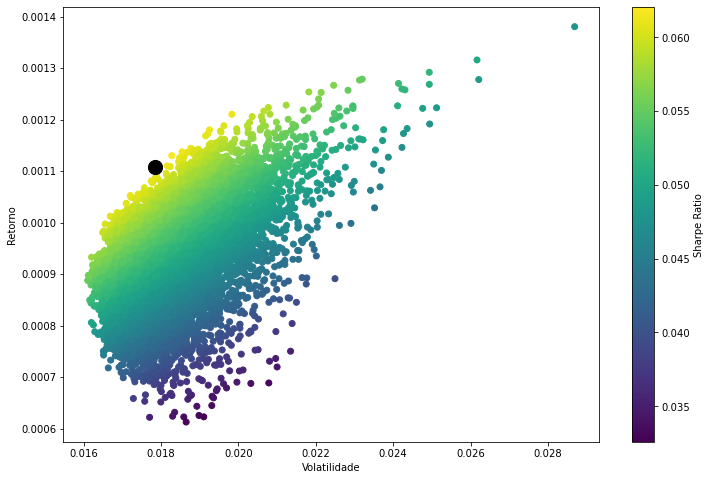

In [264]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200) # black dot
plt.show()

Nós podemos ver no gráfico acima o conjunto de portfólios simulados, pois o peso $w_i$ de cada ativo foi simulado e criamos um conjunto de $n = 10000$ carteiras e escolhemos no ponto preto a que tem maior **Sharpe Ratio**, pelas razões explicadas anteriormente. Esse dado nos dá uma noção do portfólio ponderado pelo risco.

In [265]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [266]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1),(0,1),(0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2),(0.2))

In [267]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

     fun: -0.06295901491402044
     jac: array([ 2.95109702e-02,  3.14744189e-04, -4.99407761e-04,  1.17903221e-02,
        1.21007673e-04, -6.54682517e-05])
 message: 'Optimization terminated successfully'
    nfev: 98
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([8.03804609e-17, 5.08887039e-01, 3.00752372e-01, 0.00000000e+00,
       1.33563131e-02, 1.77004276e-01])


In [268]:
frontier_y = np.linspace(0.0005, 0.0013, 200)

In [269]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [270]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

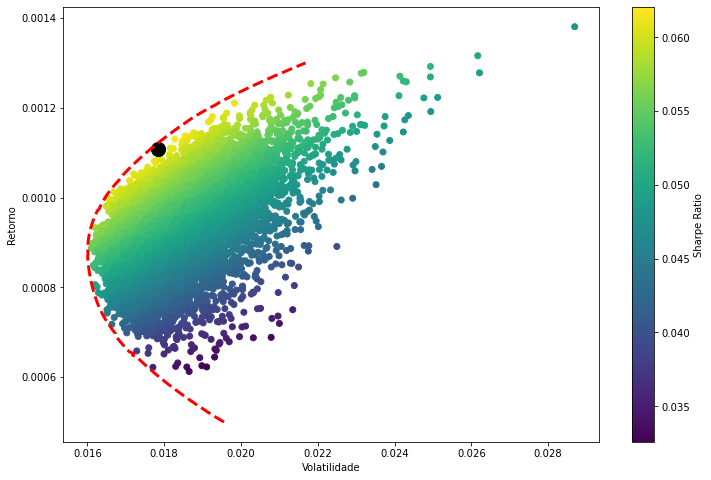

In [271]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200)
# plt.savefig('cover.png')
plt.show()